**ARBOLES DE DESICIÓN**

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Cargamos nuestro DataSet
titanic = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# Mostramos una lista con los primeros 20 datos. 
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.shape

(891, 12)

In [5]:
# Mostramos el tipo de datos que contiene nuestro Dataset
print(titanic.dtypes)
titanic.dropna(inplace=True)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Realizamos una analisis estadistico de nuestro DataSet
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<Axes: xlabel='Age'>

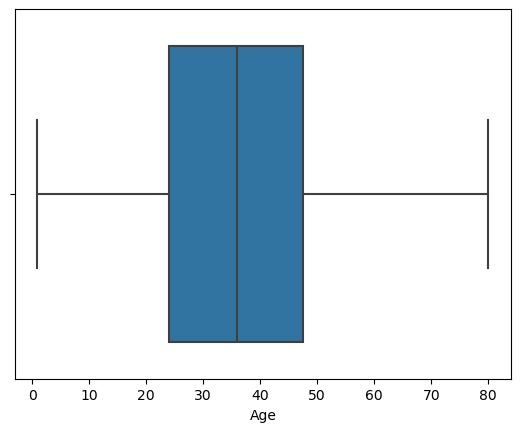

In [7]:
sns.boxplot(x=titanic['Age'])

<Axes: xlabel='Age', ylabel='Survived'>

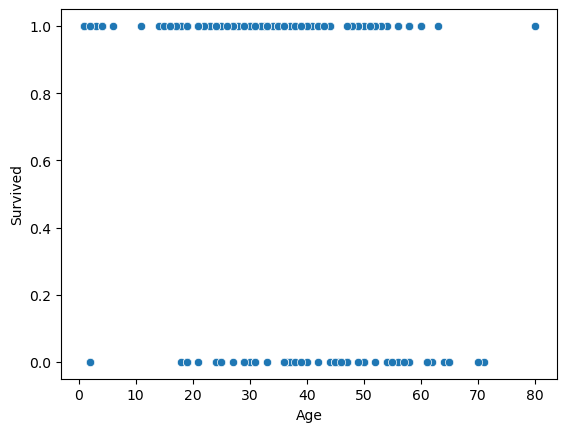

In [8]:
# Buscamos relaciones entre variables 
sns.scatterplot(x='Age', y='Survived', data=titanic)

<Axes: xlabel='Sex', ylabel='Survived'>

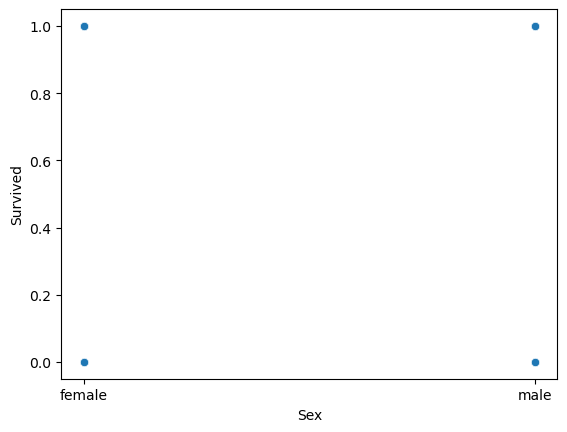

In [9]:
# Buscamos relaciones entre variables 
sns.scatterplot(x='Sex', y='Survived', data=titanic)

<Axes: xlabel='Pclass', ylabel='Survived'>

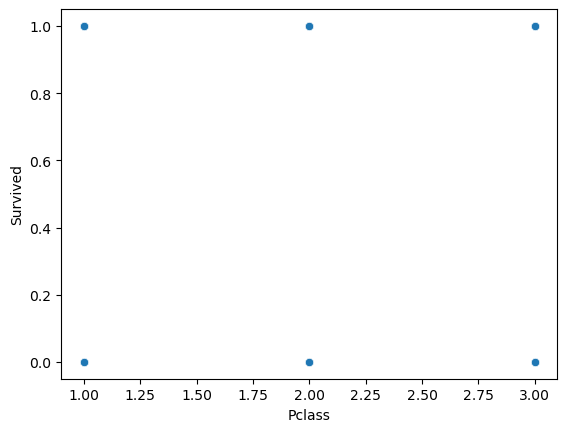

In [10]:
# Buscamos relaciones entre variables 
sns.scatterplot(x='Pclass', y='Survived', data=titanic)

<Axes: xlabel='SibSp', ylabel='Survived'>

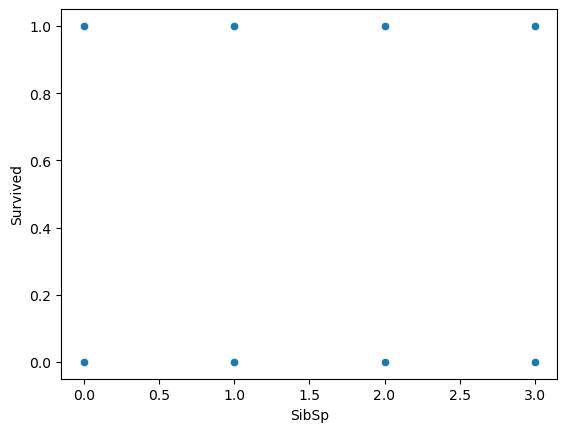

In [11]:
# Buscamos relaciones entre variables 
sns.scatterplot(x='SibSp', y='Survived', data=titanic)

<Axes: xlabel='Fare', ylabel='Survived'>

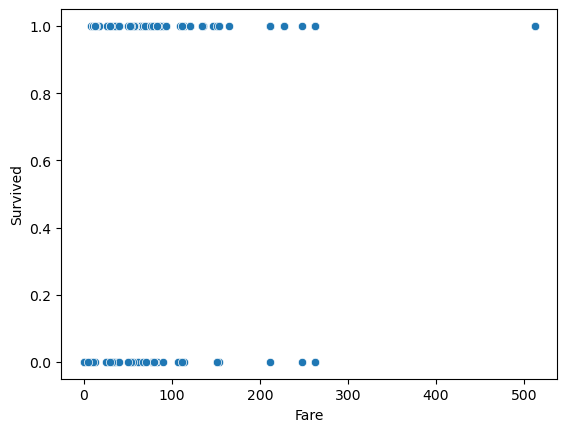

In [12]:
# Buscamos relaciones entre variables 
sns.scatterplot(x='Fare', y='Survived', data=titanic)

<Axes: xlabel='Parch', ylabel='Survived'>

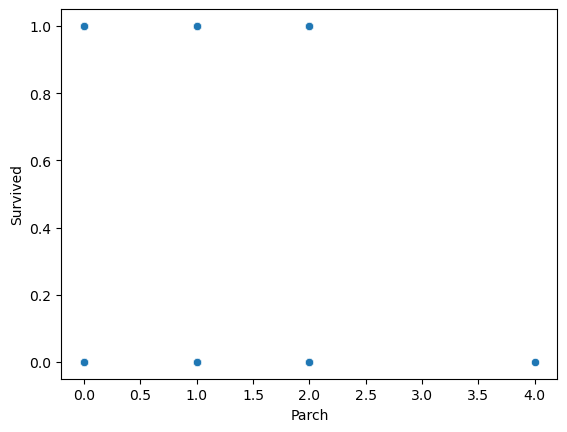

In [13]:
# Buscamos relaciones entre variables 
sns.scatterplot(x='Parch', y='Survived', data=titanic)

C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Survived', ylabel='Count'>

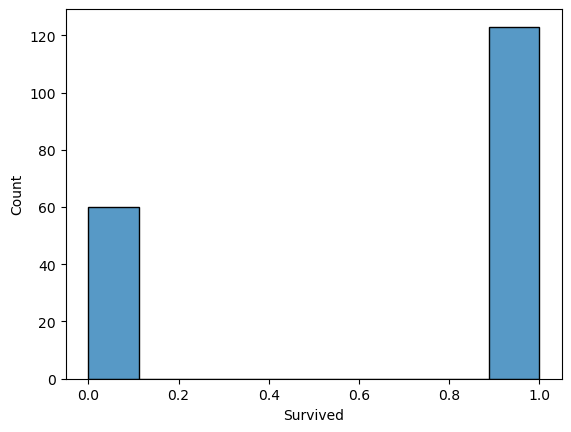

In [14]:
# Creación del Histograma para la variable de sobrevivencia 
sns.histplot(titanic['Survived'])

In [15]:
# Implementamos un cambio en nuestro data set, cambiando el tipo de dato de acuerdo al sexo. 0 Masculino y 1 Femenino
titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1})

In [16]:
# Revisamos si los cmabios se aplicaron correctamente 
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",0,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C


In [17]:
# cuenta de valores nulos en cada columna
valores_nulos_por_columna = titanic.isnull().sum()

# cuenta total de todos los valores nulos en el DataFrame
total_valores_nulos = titanic.isnull().sum().sum()

# Imprimir los resultados
print(valores_nulos_por_columna)
print("Total de valores nulos en el DataFrame:", total_valores_nulos)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Total de valores nulos en el DataFrame: 0


In [18]:
# Eliminamos datos que no tienen mucha relevancia en nuestro Dataset
titanic.drop(['PassengerId', 'Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [23]:
#Luego de realizar la limpieza de las columnas que no son tan relevantes para nuestro Dataset queda de la siguiente manera
titanic.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [24]:
# Vamos a renombrar nuestras columnas 
titanic.rename(columns={'Survived': 'Sobrevivio'}, inplace=True)
titanic.rename(columns={'Pclass': 'Clase'}, inplace=True)
titanic.rename(columns={'Sex': 'Sexo'}, inplace=True)
titanic.rename(columns={'Age': 'Edad'}, inplace=True)
titanic.rename(columns={'SibSp': 'Hermanos a Bordo'}, inplace=True)
titanic.rename(columns={'Parch': 'padres e hijos a bordo'}, inplace=True)
titanic.rename(columns={'Fare': 'Tarifa'}, inplace=True)
titanic.rename(columns={'Cabin': 'Cabina'}, inplace=True)
titanic.rename(columns={'Embarked':'Lugar Embarque'}, inplace=True)

In [25]:
titanic.columns.tolist()

['Sobrevivio',
 'Clase',
 'Sexo',
 'Edad',
 'Hermanos a Bordo',
 'padres e hijos a bordo',
 'Tarifa']

In [26]:
# Mostramos el tipo de datos que existen en nuestro Dataset
titanic.dtypes

Sobrevivio                  int64
Clase                       int64
Sexo                        int64
Edad                      float64
Hermanos a Bordo            int64
padres e hijos a bordo      int64
Tarifa                    float64
dtype: object

In [29]:
# Creamos un diccionario que asigne columnas a los tipos de datos Edad y Tarifa
convert_dict = {'Edad': 'int64', 'Tarifa': 'int64'}  # Add other numeric columns as needed

titanic = titanic.astype(convert_dict)


In [50]:
# Evidenciamos el cambio 
titanic.dtypes

Sobrevivio                int64
Clase                     int64
Sexo                      int64
Edad                      int64
Hermanos a Bordo          int64
padres e hijos a bordo    int64
Tarifa                    int64
dtype: object

In [51]:
# Paso 3 buscamos correlaciones en el modelo 
correlaciones = titanic.corr()
# Correlación de 'Sobrevivio' con las demás variables
correlacion_con_sobrevivio = correlaciones['Sobrevivio'].sort_values(ascending=False)


In [59]:
predictors_col = ["Edad", "Clase", "Sexo","Hermanos a Bordo","padres e hijos a bordo","Tarifa"]
target_col = ['Sobrevivio']

In [61]:
predictors = titanic [predictors_col]
target = titanic [target_col]

In [62]:
corr = predictors.corr()
corr

,Edad,Clase,Sexo,Hermanos a Bordo,padres e hijos a bordo,Tarifa
Edad,1.000000,-0.306681,-0.184384,-0.155949,-0.271880,-0.092765
Clase,-0.306681,1.000000,0.046181,-0.103592,0.047496,-0.315158
Sexo,-0.184384,0.046181,1.000000,0.104291,0.089581,0.129967
Hermanos a Bordo,-0.155949,-0.103592,0.104291,1.000000,0.255346,0.287268
padres e hijos a bordo,-0.271880,0.047496,0.089581,0.255346,1.000000,0.390003
Tarifa,-0.092765,-0.315158,0.129967,0.287268,0.390003,1.000000


In [64]:
target

,Sobrevivio
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


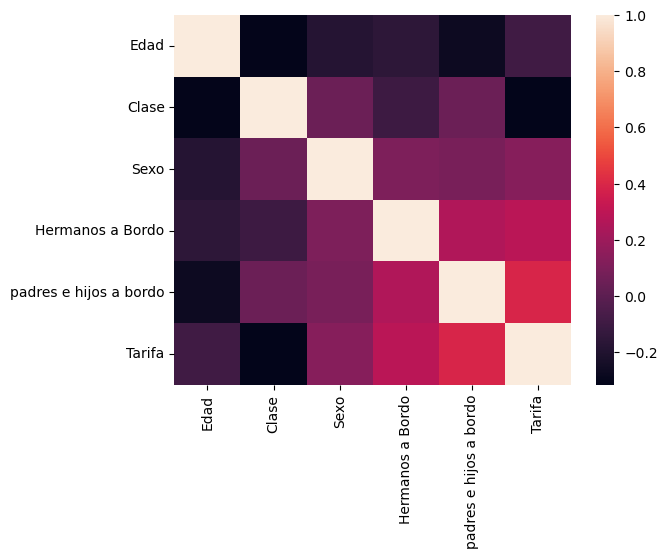

In [63]:
sns.heatmap(corr)
plt.show()

**Entrenamiento del modelo**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.2,random_state=13)

In [114]:
tree= DecisionTreeClassifier()

In [115]:
arbol= tree.fit(X_train,y_train)

[Text(0.4732142857142857, 0.9666666666666667, 'x[2] <= 0.5\ngini = 0.416\nsamples = 146\nvalue = [43, 103]'),
 Text(0.2857142857142857, 0.9, 'x[0] <= 43.0\ngini = 0.499\nsamples = 71\nvalue = [37, 34]'),
 Text(0.07142857142857142, 0.8333333333333334, 'x[0] <= 18.0\ngini = 0.464\nsamples = 41\nvalue = [15, 26]'),
 Text(0.03571428571428571, 0.7666666666666667, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.10714285714285714, 0.7666666666666667, 'x[0] <= 22.0\ngini = 0.49\nsamples = 35\nvalue = [15, 20]'),
 Text(0.07142857142857142, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.14285714285714285, 0.7, 'x[5] <= 6.5\ngini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(0.10714285714285714, 0.6333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.17857142857142858, 0.6333333333333333, 'x[4] <= 1.5\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(0.14285714285714285, 0.5666666666666667, 'x[0] <= 28.5\ngini = 0.428\nsamples = 29\nvalue = [9, 20]'),
 Text(0

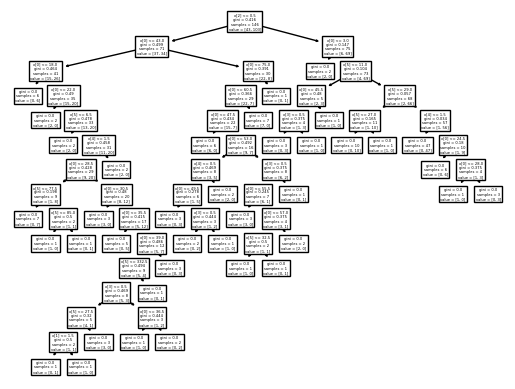

In [116]:
plot_tree(arbol)

In [117]:
predicciones = arbol.predict(X_test)

In [118]:
predicciones

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [119]:
# Primero, extraemos los valores reales de y_test como una lista
valores_reales = [y[0] for y in y_test.values.tolist()]

In [120]:
# Luego, creamos la matriz de confusión con pd.crosstab
matriz_confusion = pd.crosstab(np.array(valores_reales), predicciones, rownames=['Actual'], colnames=['Predicciones'])

In [122]:
# Mostrar la matriz de confusión
print(matriz_confusion)

Predicciones   0   1
Actual              
0             10   7
1              1  19


In [123]:
# Mostramos el rendimiento de nuestro modelo 
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.7837837837837838

In [130]:
# Calcular precisión
precision = precision_score(y_test, predicciones)

In [131]:
# Calcular recall
recall = recall_score(y_test, predicciones)

In [132]:
# Calcular F1-score
f1 = f1_score(y_test, predicciones)

In [133]:
# Imprimir las métricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.7307692307692307
Recall: 0.95
F1-Score: 0.8260869565217392


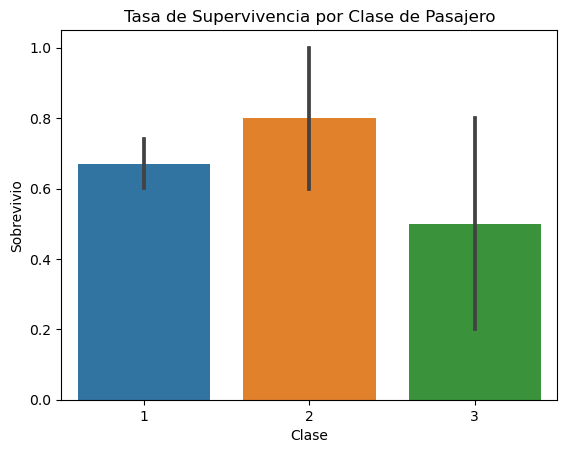

In [139]:
# grafico que muestra la supervivencia por clase de pasajero.
sns.barplot(x='Clase', y='Sobrevivio', data=titanic)
plt.title('Tasa de Supervivencia por Clase de Pasajero')
plt.show()

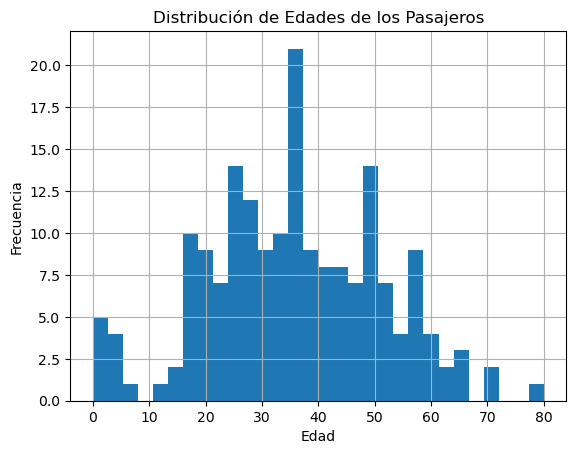

In [140]:
# Histograma de edades de los pasajeros
titanic['Edad'].hist(bins=30)
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

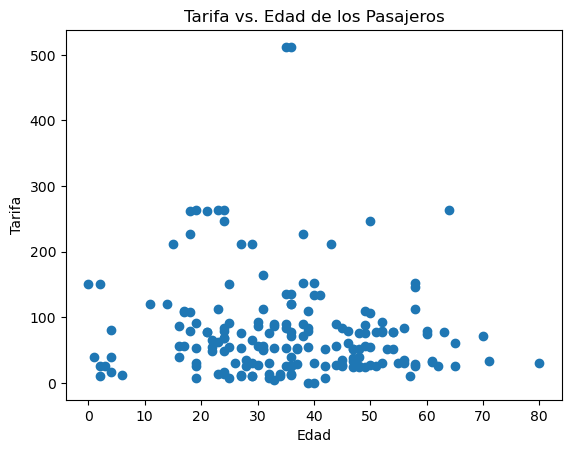

In [141]:
# Gráfico de dispersión de tarifa vs edad
plt.scatter(titanic['Edad'], titanic['Tarifa'])
plt.title('Tarifa vs. Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

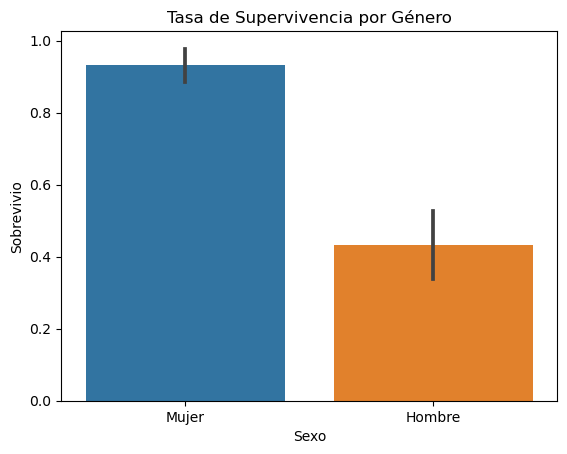

In [143]:
titanic['Sexo'] = titanic['Sexo'].map({0: 'Hombre', 1: 'Mujer'})
sns.barplot(x='Sexo', y='Sobrevivio', data=titanic)
plt.title('Tasa de Supervivencia por Género')
plt.show()

C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


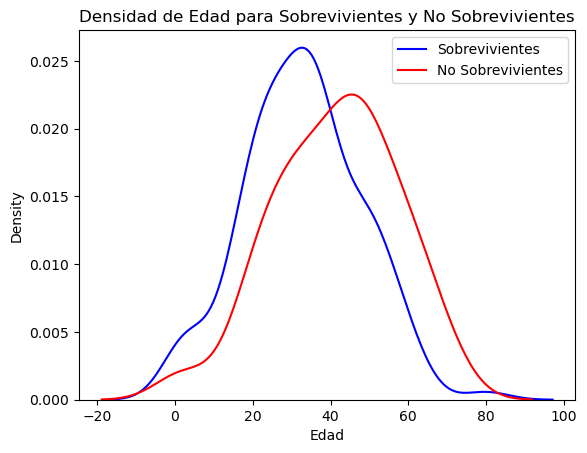

In [148]:
sns.kdeplot(titanic[titanic['Sobrevivio'] == 1]['Edad'], label='Sobrevivientes', color = 'blue')
sns.kdeplot(titanic[titanic['Sobrevivio'] == 0]['Edad'], label='No Sobrevivientes', color='red')
plt.title('Densidad de Edad para Sobrevivientes y No Sobrevivientes')
plt.xlabel('Edad')
plt.legend()
plt.show()